# Proyecto módulo 3

En este notebook te vamos a proponer tres sets de datos para que puedas desarrollar un pequeño proyecto asociado al módulo 3 utilizando los distintos modelos que hemos ido viendo a lo largo del módulo. 

Escoge alguno de los tres sets y utiliza todas las herramientas que has visto en el módulo y en los módulos previos para crear un modelo que resuelva el problema asociado a cada set de datos. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Fraude en tarjeta de crédito [dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

Este set de datos está pensado para poder entrenar un modelo de clasificación que identifique operaciones fraudulentas de tarjetas de crédito para que a los clientes no les cobren por compras que no han realizado. 


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Apuntes/semana_8/Proy_Mod_3/creditcard.csv')

## Precio de los aguacates [dataset](https://www.kaggle.com/datasets/neuromusic/avocado-prices)

Este set de datos nos permite ver la evolución a lo largo del tiempo del precio de los aguacates en distintos mercados de EEUU y es perfecto para la realización de un análisis de series temporales que ayuden a predecir la evolución de los precios de este alimento


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Apuntes/semana_8/Proy_Mod_3/avocado.csv')

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold


## Costes de los seguros médicos [dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

Este set de datos nos da información sobre usuarios de seguros médicos y el coste asociado del seguro médico para esos usuarios. Es un buen set de datos para realizar un análisis de regresión que nos permita estimar el coste del seguro médico para nuevos usuarios. 



In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Apuntes/semana_8/Proy_Mod_3/insurance.csv')

# Cargamos las librerias

In [ ]:
import os
import numpy as np
import pandas as pd

# Librerías para gráficos
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import warnings

# Cargamos el dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Apuntes/semana_8/Proy_Mod_3/avocado.csv')

# Comprobamos las caracteristicas de nuestro dataset

In [ ]:
df.shape

(18249, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Eliminamos la columna `Unnamed: 0`

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

# Comprobamos si existen valores nulos

In [ ]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde8a7b2e90>,
      dtype=object)

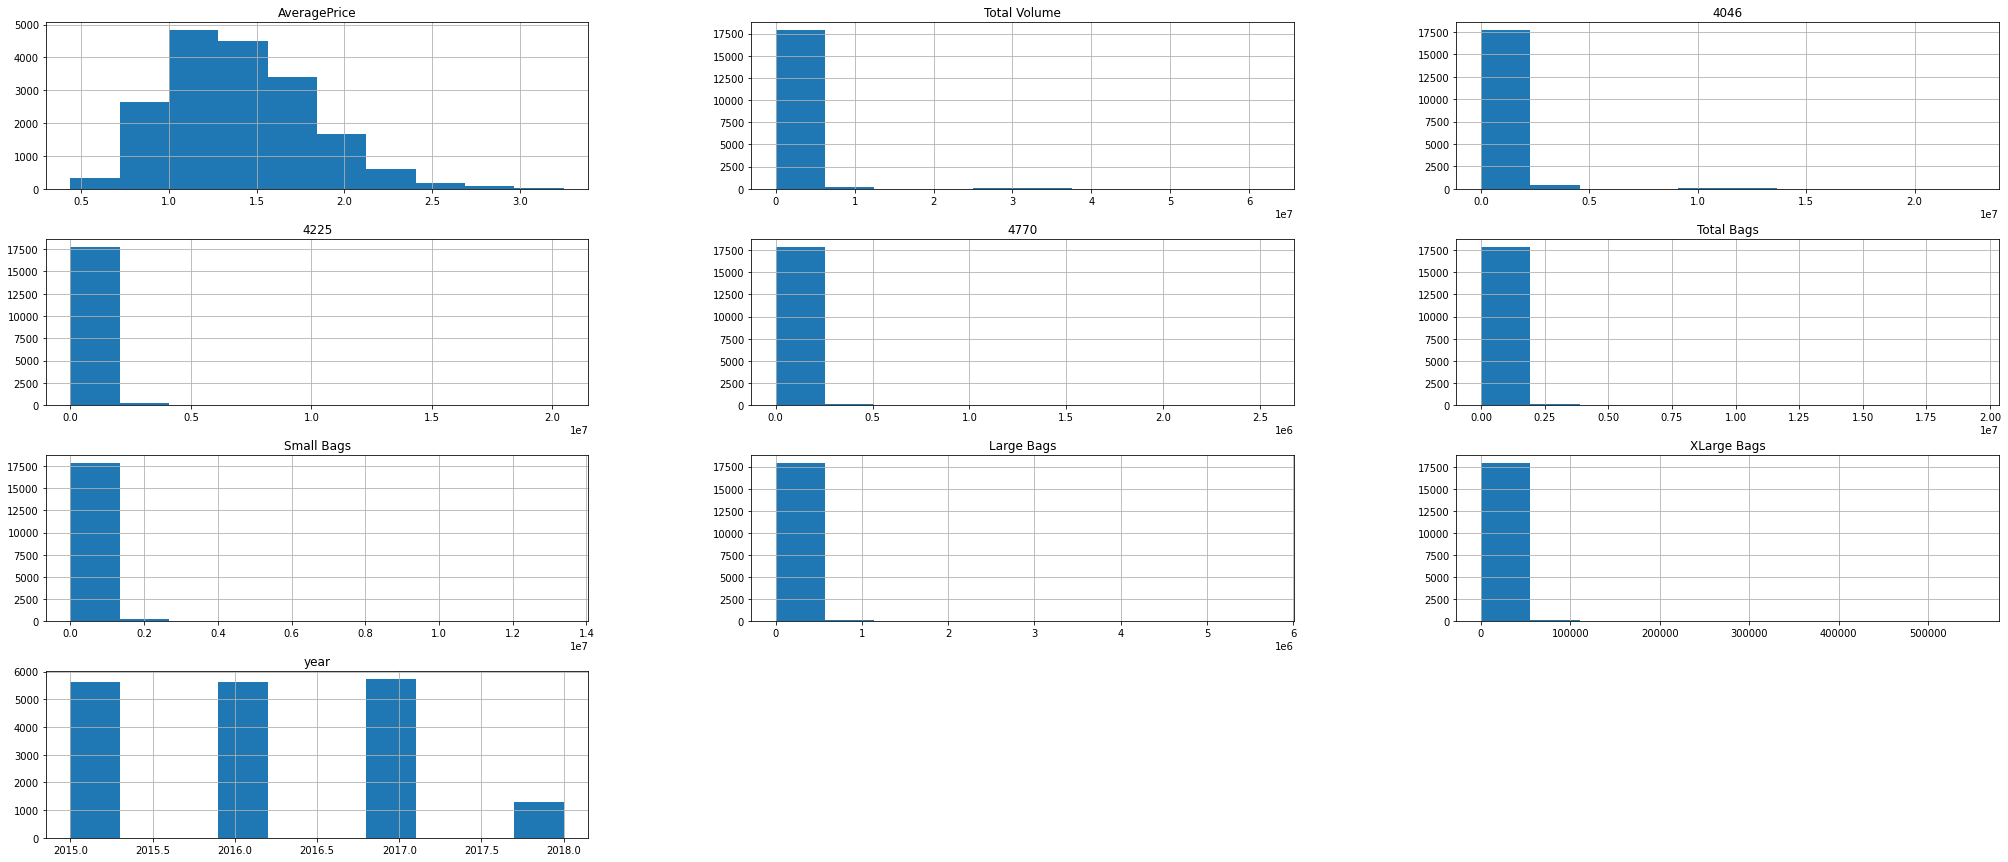

In [ ]:
plt.rcParams["figure.figsize"] = (35,15)
df.hist()

# Modificación de datos

## Convertimos la variable `Date` a formato `datetime`

In [ ]:
df["Date"] =  pd.to_datetime(df["Date"], format="%Y-%m-%d")

In [ ]:
df.sort_values(by="Date")

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


## Comprobamos cuantos valores tienen las variables de tipo `objeto`

In [ ]:
col_str = df.select_dtypes(['object']).columns
col_val_obj = df[col_str].apply(lambda x: len(x.dropna().unique()))

col_val_obj

type       2
region    54
dtype: int64

## Comprobamos que la variable `type` solo tiene los valores `conventional` y `organic` por lo que podriamos realizarle un label encoder

`conventional` = 0

`organic` = 1

In [ ]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Análisis de Datos

## Ventas de aguacates en función de su etiquetaje

In [ ]:
df_1= df[['4046','4225','4770']]

Text(0.5, 1.0, 'Cantidad de venta de aguacates según su PLU')

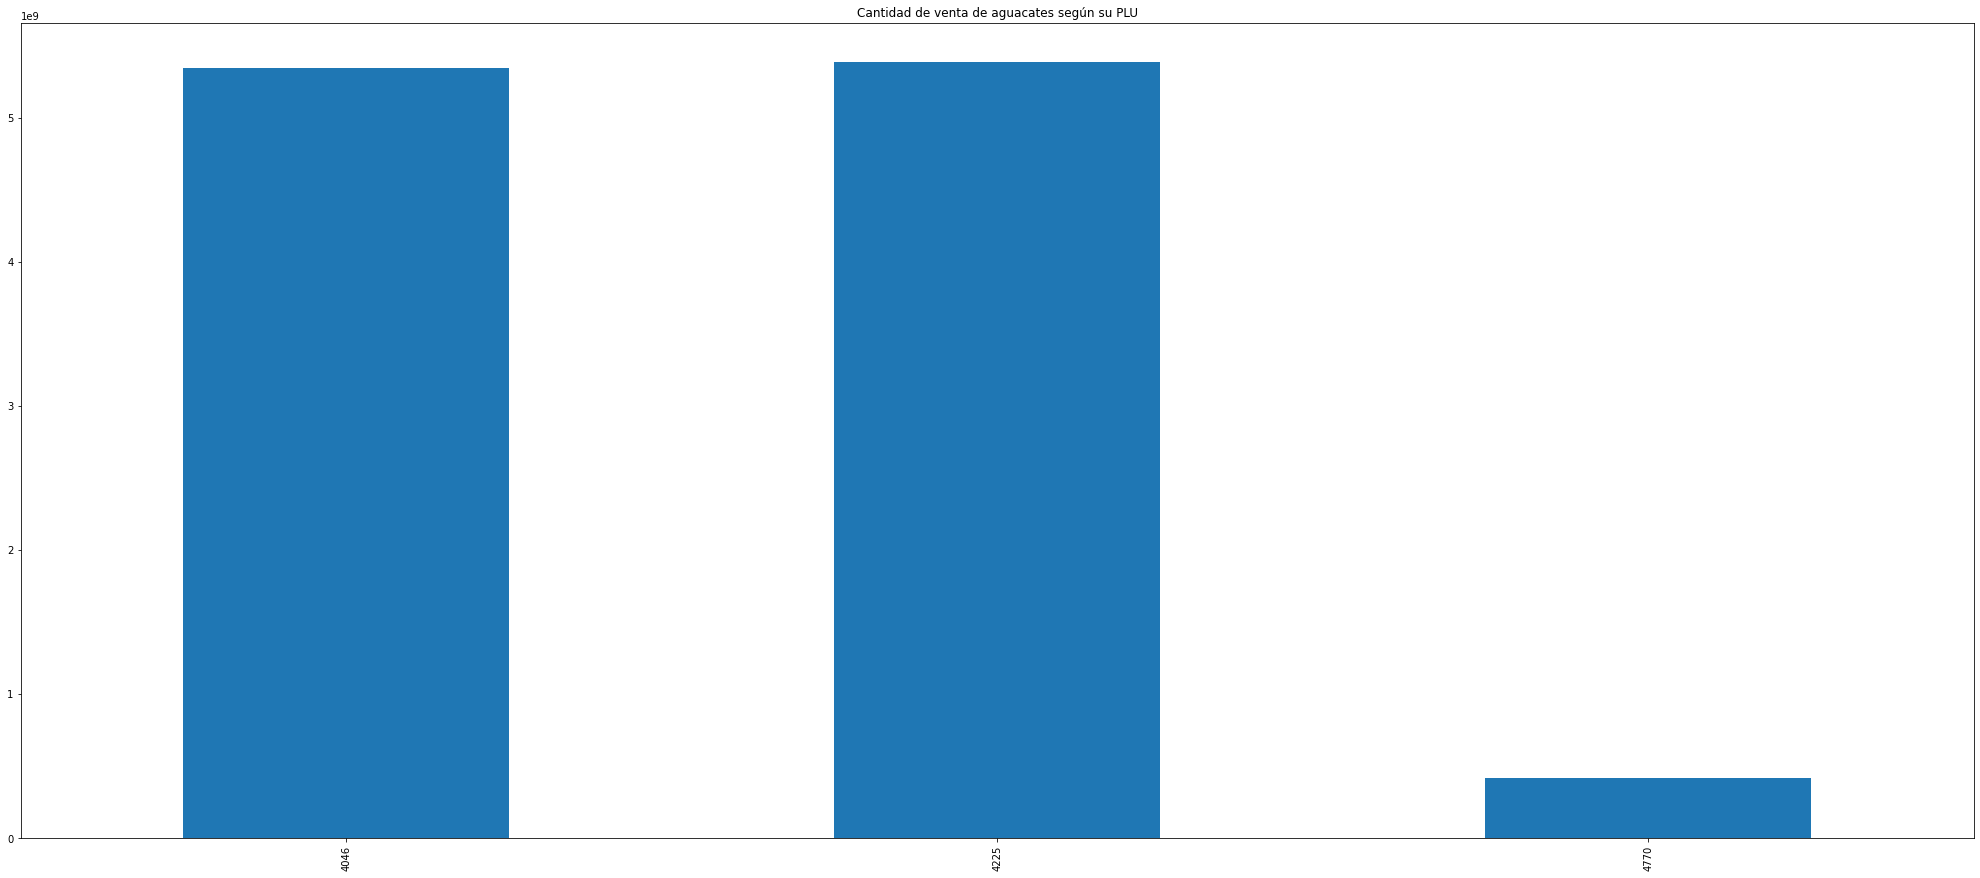

In [ ]:
k = df_1.sum(axis=0)
# or k = df.sum(axis=1)/(len(df.columns)-1) to remove ID column
k.plot.bar()
plt.title('Cantidad de venta de aguacates según su PLU')

La mayoria de aguacates están etiquetados como `4046` y como `4225`

Los códigos PLU están conformados por números de 4 o 5 dígitos y fueron creados para hacer la verificación y el control de inventario más fácil, rápido, y preciso, están basados en atributos del producto como la variedad, el tipo de cultivo, el tamaño, o si se cultivó en una región específica.

## Tipo de aguacates

In [ ]:
df['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

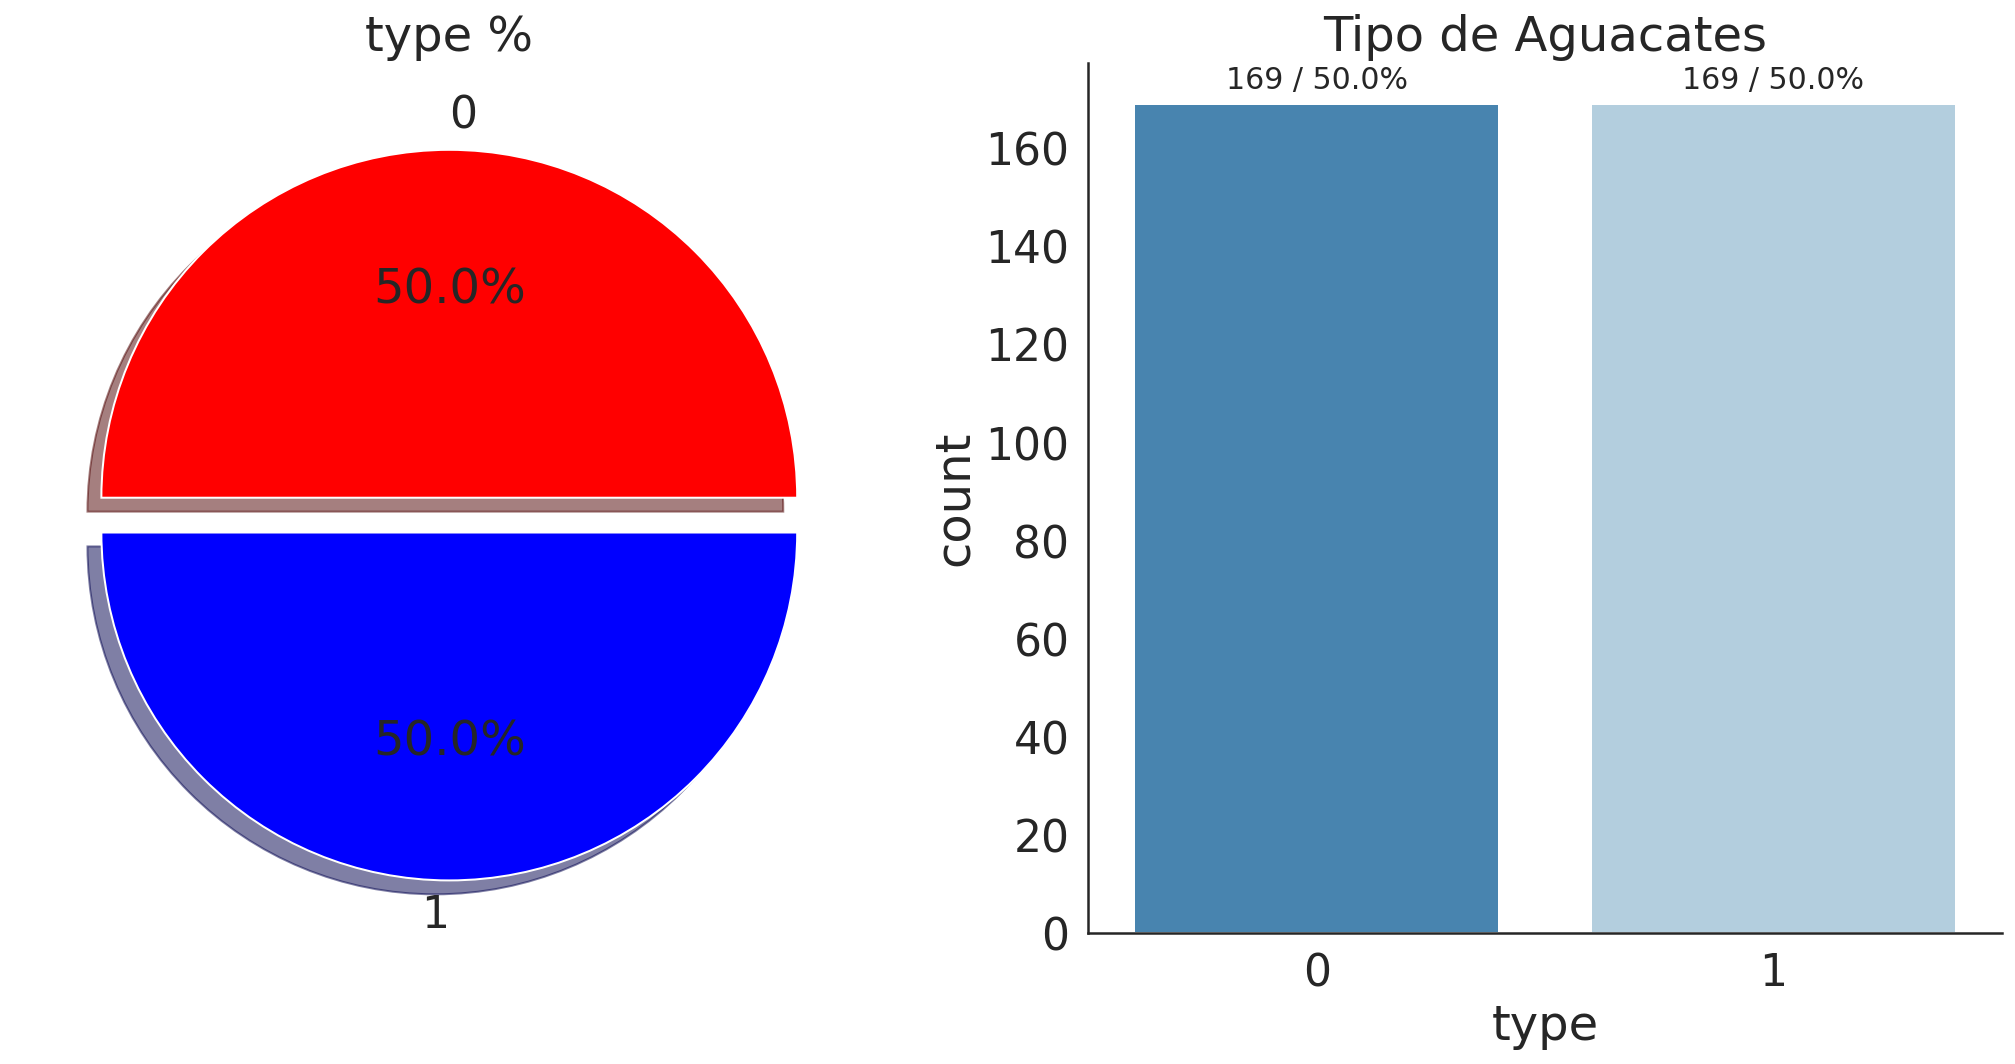

In [ ]:
total_cnt = df['type'].count()
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df['type'].value_counts().plot.pie(explode = [0, 0.1], 
                                               autopct = '%1.1f%%', 
                                               ax = ax[0],
                                               shadow = True,
                                               colors = ['red', 'blue'])
ax[0].set_title('type %')
ax[0].set_ylabel('')
sns.countplot('type', data = df, ax = ax[1], palette='Blues_r')
ax[1].set_title('Tipo de Aguacates')
for p in ax[1].patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax[1].text(x + width / 2, height + 5, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=15)
sns.despine()

Los listados de nuestro datataset se dividen casi a partes iguales entre de tipo de cultivo tradicional y orgánico

## Origen de los aguacates

In [ ]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

Text(0.5, 1.0, 'Región de cultivo')

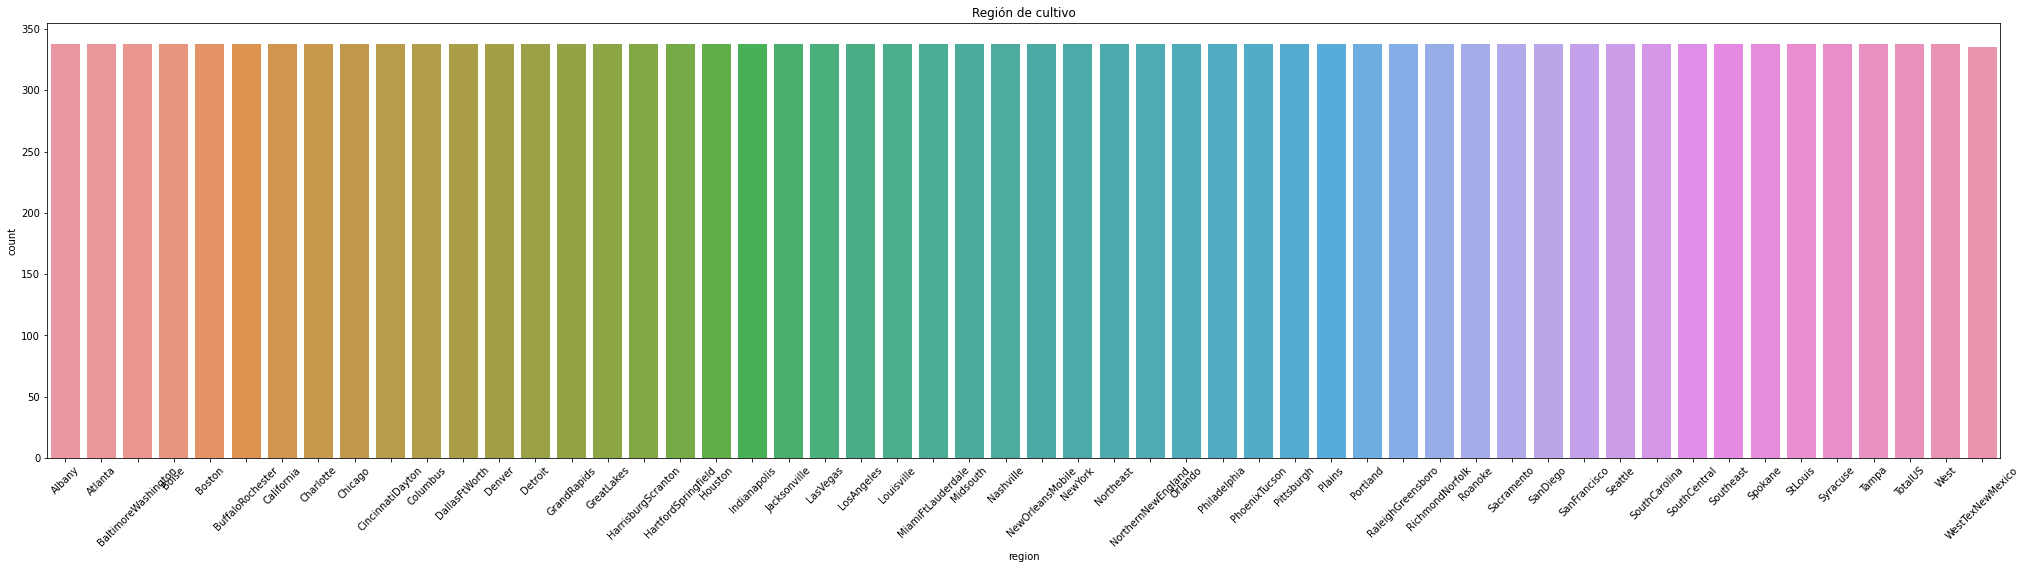

In [ ]:
sns.countplot(data = df, x ='region')
fig = plt.gcf()
fig.set_size_inches(35,8)
plt.xticks(rotation = 45)
plt.title('Región de cultivo')

Observamos que todas las regiones tienen la misma cantidad de listados, 338, a excepción de `WestTexNewMexico` que tiene 335

Text(0.5, 1.0, 'Región de origen y tipo de cultivo')

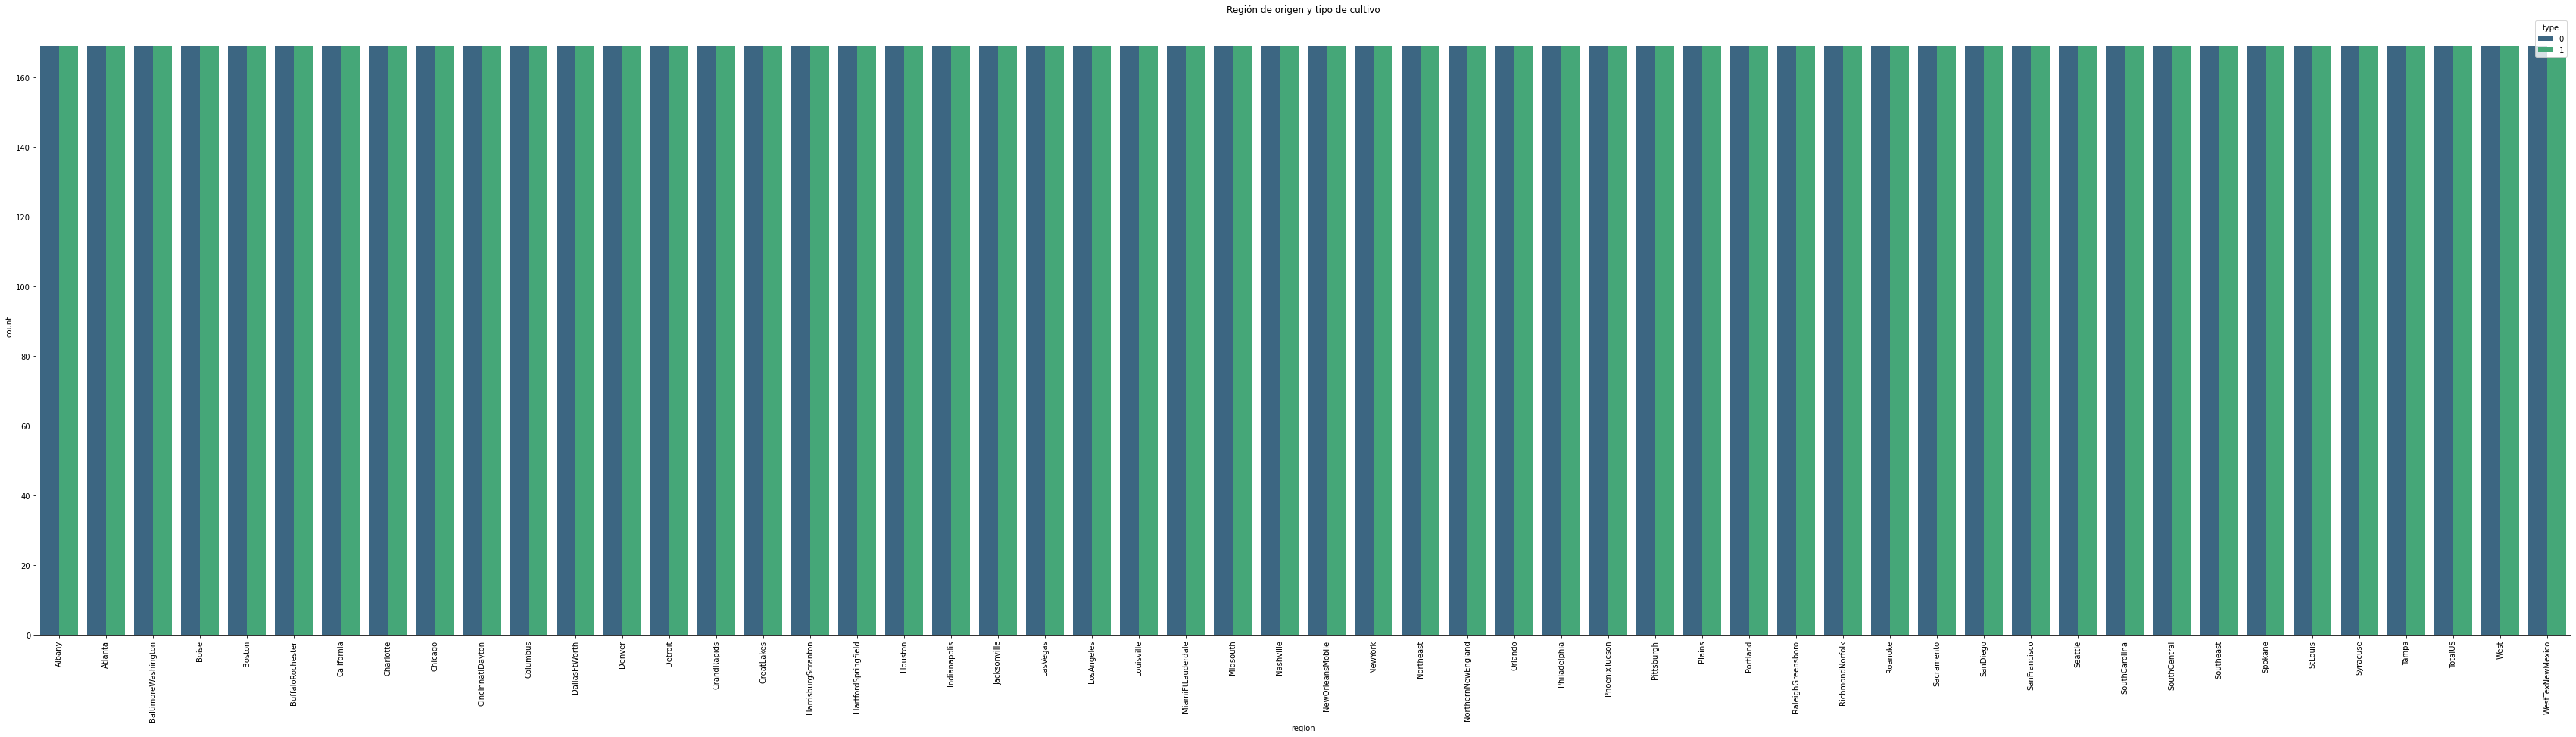

In [ ]:
sns.countplot(data = df, x ='region', hue = 'type', palette = 'viridis')
fig = plt.gcf()
fig.set_size_inches(60,15)
plt.xticks(rotation = 90)
plt.title('Región de origen y tipo de cultivo')

## Ventas anuales

In [ ]:
# Seleccionamos solo los listados para con valor `TotalUS`
df = df.loc[df['region']=='TotalUS']

In [ ]:
df.groupby(['year'])['Total Volume'].sum()

year
2015    1.657255e+09
2016    1.819159e+09
2017    1.864694e+09
2018    5.236323e+08
Name: Total Volume, dtype: float64

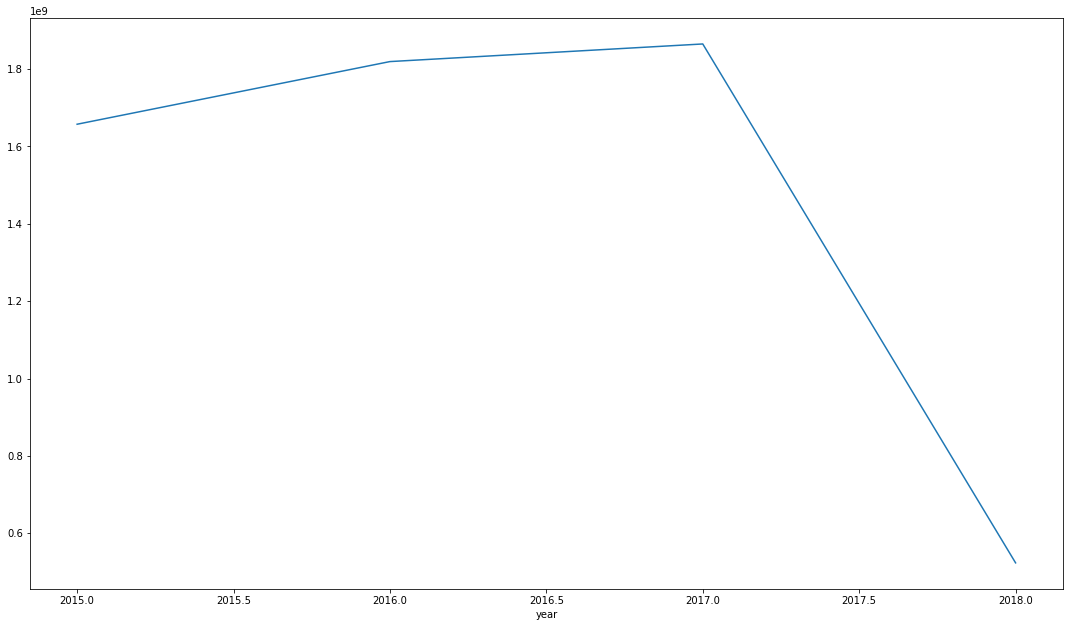

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plot_df = df.groupby(['year'])['Total Volume'].sum()
# fig.savefig('test1png.png', dpi=100)
plot_df.plot()

In [ ]:
df['Date'].max()

Timestamp('2018-03-25 00:00:00')

En la gráfica observamos un progresivo aunmento en la venta de aguacates hasta el año 2017. La gráfica nos muestra lo que parece ser un descenso en las ventas en 2018, pero esto se debe a que los datos de nuestro listado solo abarcan hasta el 25 de marzo de ese año.

## Precio medio anual

In [ ]:
df.groupby(['year'])['AveragePrice'].mean()

year
2015    1.257404
2016    1.263558
2017    1.436604
2018    1.307083
Name: AveragePrice, dtype: float64

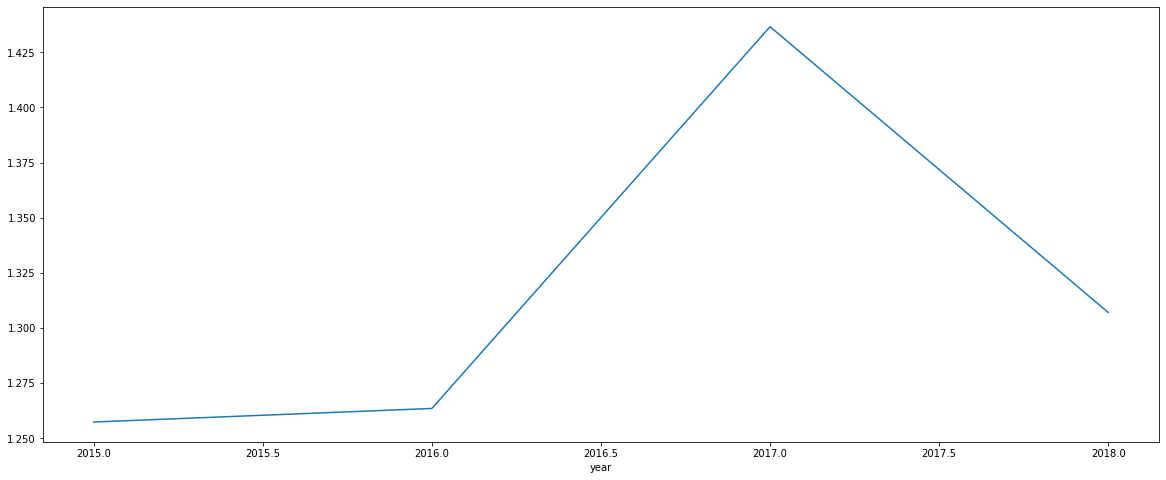

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
plot_df = df.groupby(['year'])['AveragePrice'].mean()
plot_df.plot()

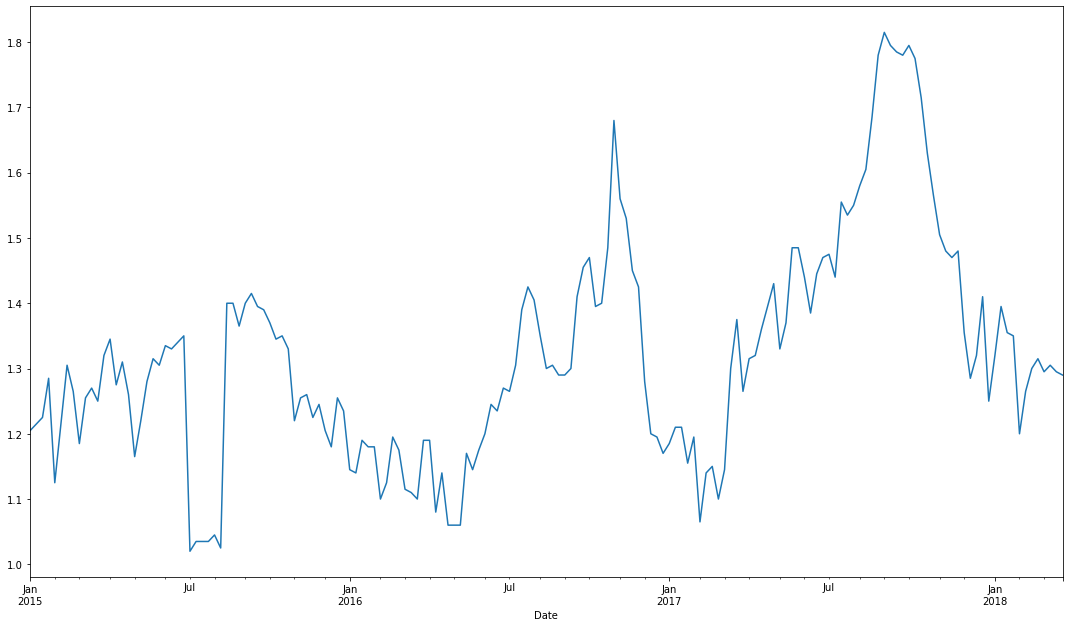

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plot_df = df.groupby(['Date'])['AveragePrice'].mean()
# fig.savefig('test1png.png', dpi=100)
plot_df.plot()

Se espera que el mayor volumen de producción se dé desde mediados de abril hasta mediados de julio, con una producción menor entre agosto y octubre, distribución que se ha mantenido relativamente constante en los últimos años para la temporalidad de aguacate en EE. UU. 

Por eso es muy importante las importaciones desde México, que hace que en temporada de mayor producción el precio es más bajo, generalmente en los meses de septiembre, octubre, noviembre diciembre, enero y febrero.

# Vamos a comprobar la correlación entre variables

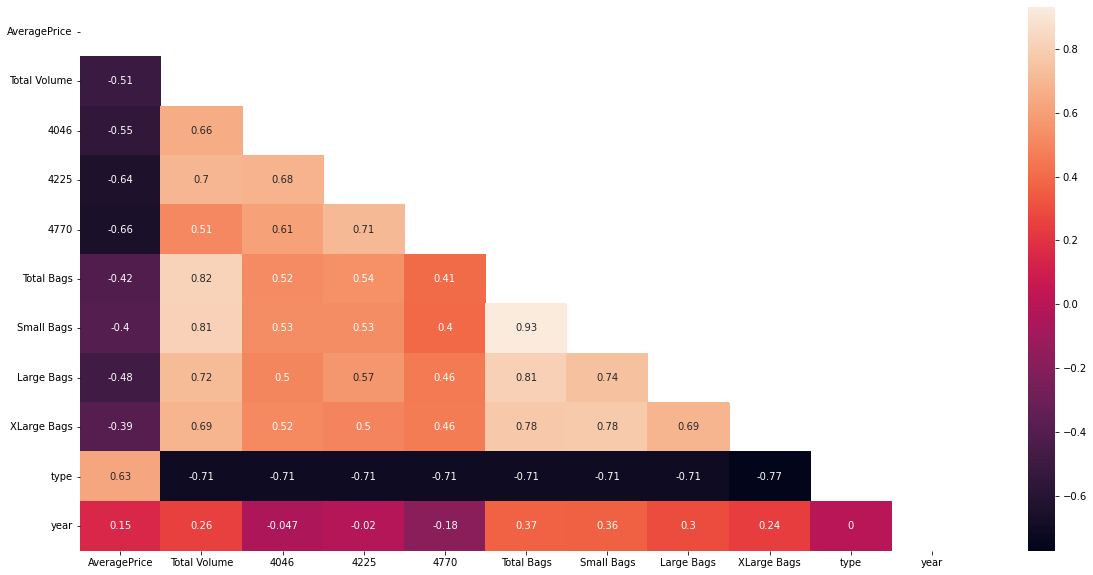

In [ ]:
corr = df.corr(method = 'kendall')
# Creamos una mascara
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 

plt.subplots(figsize=(20,10))  
# Dibujar el mapa de calor
sns.heatmap(corr.iloc[:,:],mask=mask[:,:], annot = True)

# Vamos a crear un nuevo dataframe 

Generamos un nuevo dataframe para hacer estudios de series temporales

In [ ]:
df_test=df[['Date','AveragePrice','type']]
df_test=df_test.sort_values(by="Date")
df_test=df_test.set_index('Date')

In [ ]:
df_test.head()

,AveragePrice,type
Date,,
2015-01-04,0.95,0
2015-01-04,1.46,1
2015-01-11,1.01,0
2015-01-11,1.42,1
2015-01-18,1.03,0


In [ ]:
# Hacemos la media para ambos tipos de aguacates
df_test['media_diaria'] = df_test.groupby(['Date'])['AveragePrice'].mean()

In [ ]:
df_test.drop(columns = ['AveragePrice','type'], inplace=True)

In [ ]:
df_test.head()

,media_diaria
Date,
2015-01-04,1.205
2015-01-04,1.205
2015-01-11,1.215
2015-01-11,1.215
2015-01-18,1.225


In [ ]:
# Eliminamos los duplicados en el índice.
df_test = df_test.groupby(df_test.index).first()

In [ ]:
df_test.head()

,media_diaria
Date,
2015-01-04,1.205
2015-01-11,1.215
2015-01-18,1.225
2015-01-25,1.285
2015-02-01,1.125


In [ ]:
df_Ar = df_test[['media_diaria']] # Para Arima
df_fb = df_test[['media_diaria']] # Para FBProphet

# Vamos a utilizar Arima para hacer un estudio de la serie temporal

In [ ]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings("ignore")

In [ ]:
df_Ar.head()

,media_diaria
Date,
2015-01-04,1.205
2015-01-11,1.215
2015-01-18,1.225
2015-01-25,1.285
2015-02-01,1.125


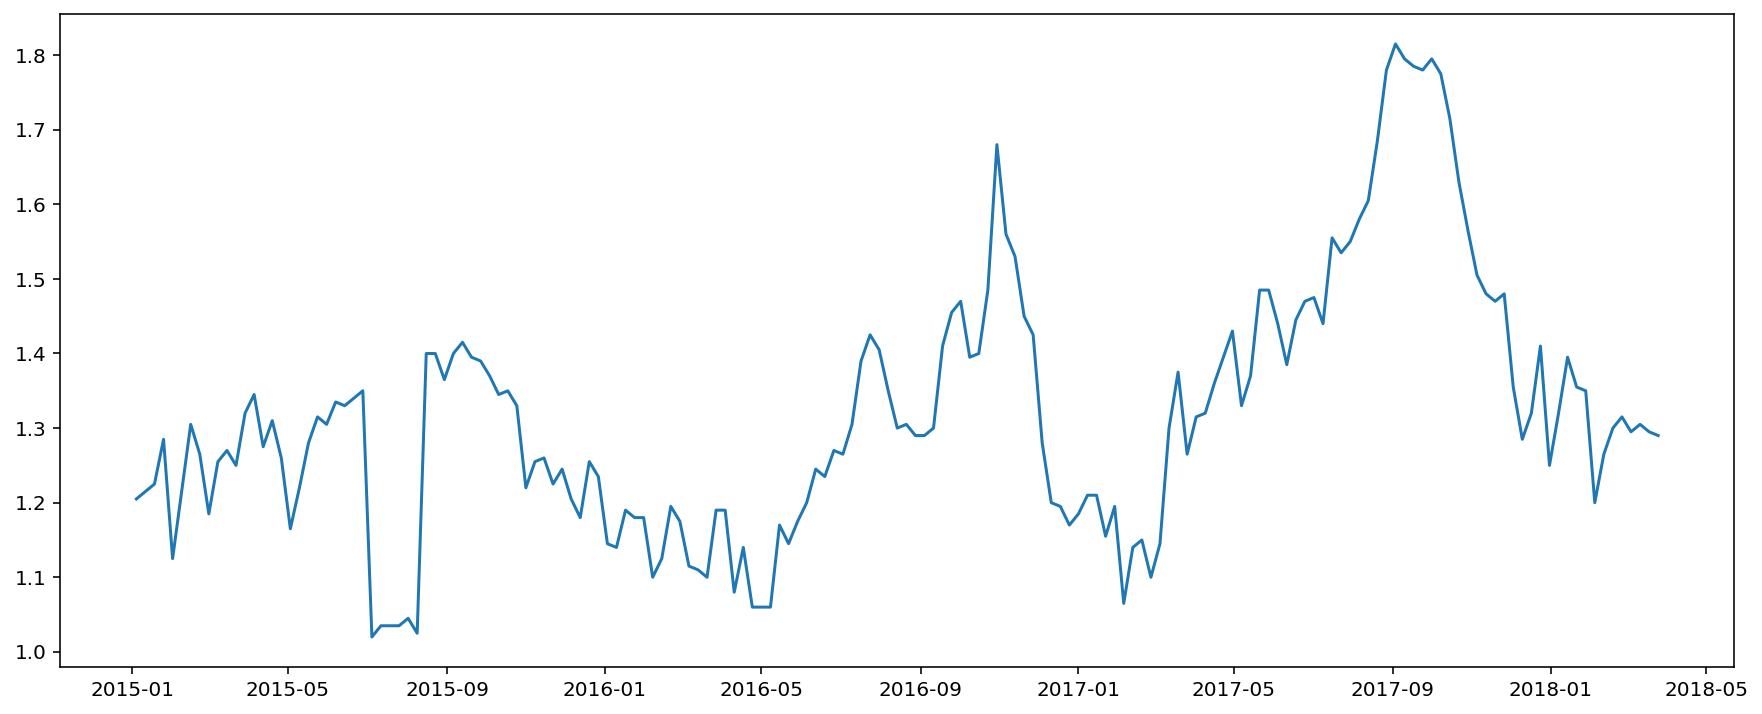

In [ ]:
# Vamos a visualizar la evolución de nuestra variable
plt.plot(df_Ar)

In [ ]:
# Vamos a comprobar si la serie temporal es estacionaria utilizando una métrica estadística llamada test de Dickey-Fuller
# que vamos a calcular con la libreria adfuller que hemos importado

def test_stationarity(timeseries):
    # Determining rolling statistics
    rol_mean = timeseries.rolling(window=12, center=False).mean()
    rol_std = timeseries.rolling(window=12, center=False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='b', label='Original')
    mean = plt.plot(rol_mean, color='r', label='Media acumulada')
    std = plt.plot(rol_std, color='black', label='Desviación típica acumulada')
    plt.legend(loc='best')
    plt.title('Media y desviación típica acumuladas')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Resultados del test Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value',
                                             '#Lags Usados',
                                             'Número de observaciones usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valor crítico (%s)'%key] = value
    print(dfoutput)

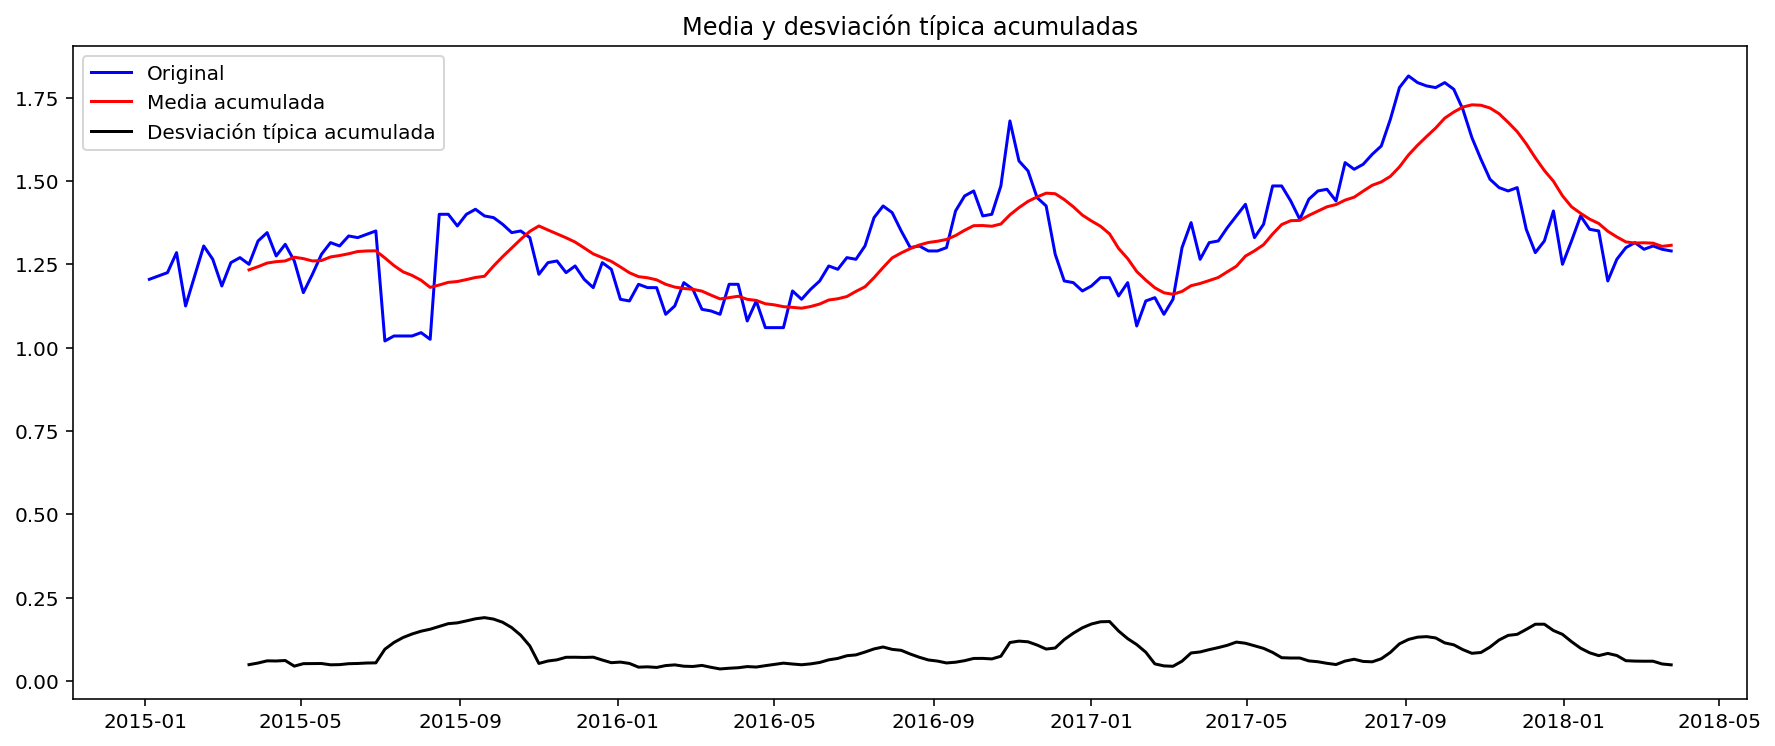

Resultados del test Dickey-Fuller:
Test Statistic                     -2.761884
p-value                             0.063928
#Lags Usados                        0.000000
Número de observaciones usadas    168.000000
Valor crítico (1%)                 -3.469886
Valor crítico (5%)                 -2.878903
Valor crítico (10%)                -2.576027
dtype: float64


In [ ]:
test_stationarity(df_Ar['media_diaria'])

Sin entrar en discutir como funciona el test estadístico que hemos utilizado, nos podemos quedar con la intuición de que si el Test Statistic es menor que los valores críticos, entonces la serie temporal es estacionaria. 

In [ ]:
# Vamos a crear un modelo ARIMA con los datos tal y como están
# Definimos los hiperparámetros para el modelo como hemos discutido antes (p,q,d)
hiperparametros = (2,1,2)
modelo = ARIMA(df_Ar['media_diaria'],order=hiperparametros)
resultados = modelo.fit(disp=-1)

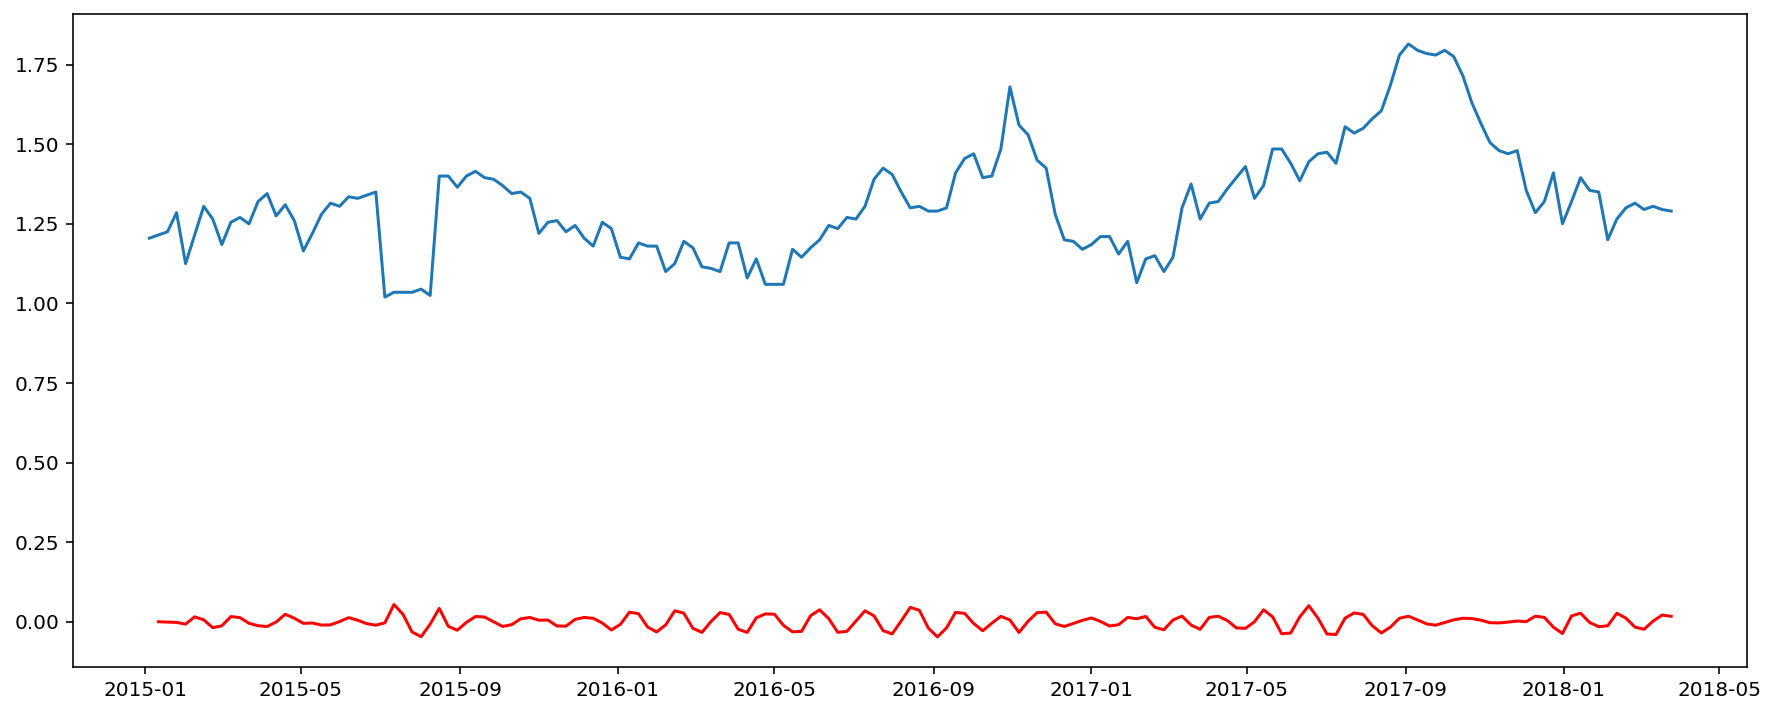

In [ ]:
plt.plot(df_Ar['media_diaria'])
plt.plot(resultados.fittedvalues, color='r')

Como podemos ver nuestra predicción (en rojo) falla claramente a la hora de intentar reproducir el comportamiento de nuestra serie temporal (en azul). Esto se debe a la falta de estacionalidad que presentan los datos y que impactan claramente en el desempeño de este modelo. 

Vamos a proceder a transformar los datos para conseguir que sean estacionarios y ver el efecto que tiene en la predicción del modelo de ARIMA. 


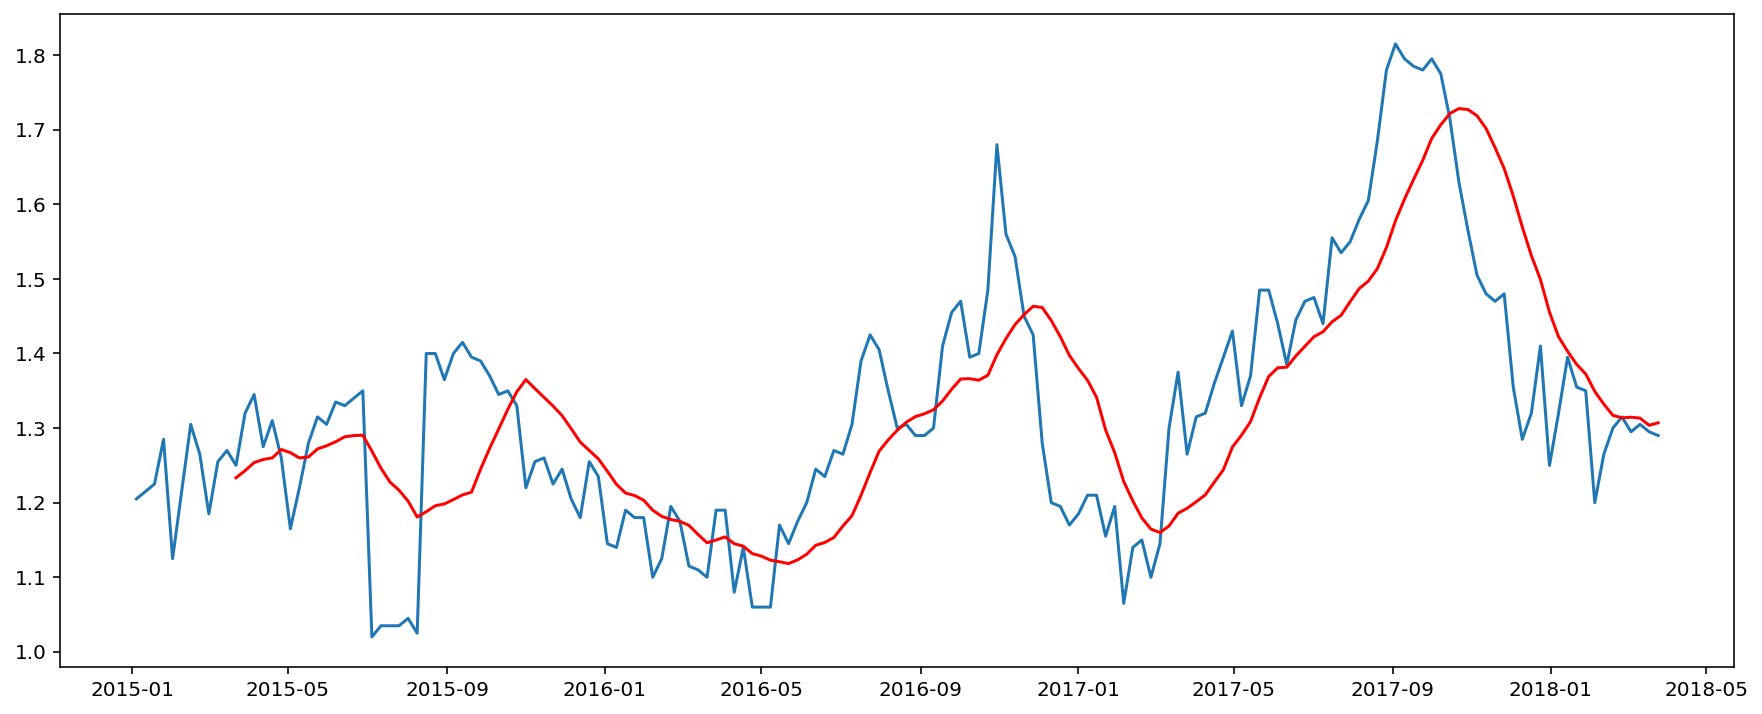

In [ ]:
# El primer paso va a ser intentar eliminar la tendencia de nuestros datos
# restando la desviación típica de los datos, que vamos a calcular utilizando la función rolling 
# de pandas

desviacion_tipica = df_Ar['media_diaria'].rolling(window=12,center=False).mean()
plt.plot(df_Ar['media_diaria'])
plt.plot(desviacion_tipica, color='r')

In [ ]:
# como hemos utilizado una ventana de 12 valores, no tenemos desviación típica para los
# primeros 11 valores y al restarle la desviación típica perderemos esos valores
diferencia = df_Ar['media_diaria'] - desviacion_tipica
diferencia.dropna(inplace=True)

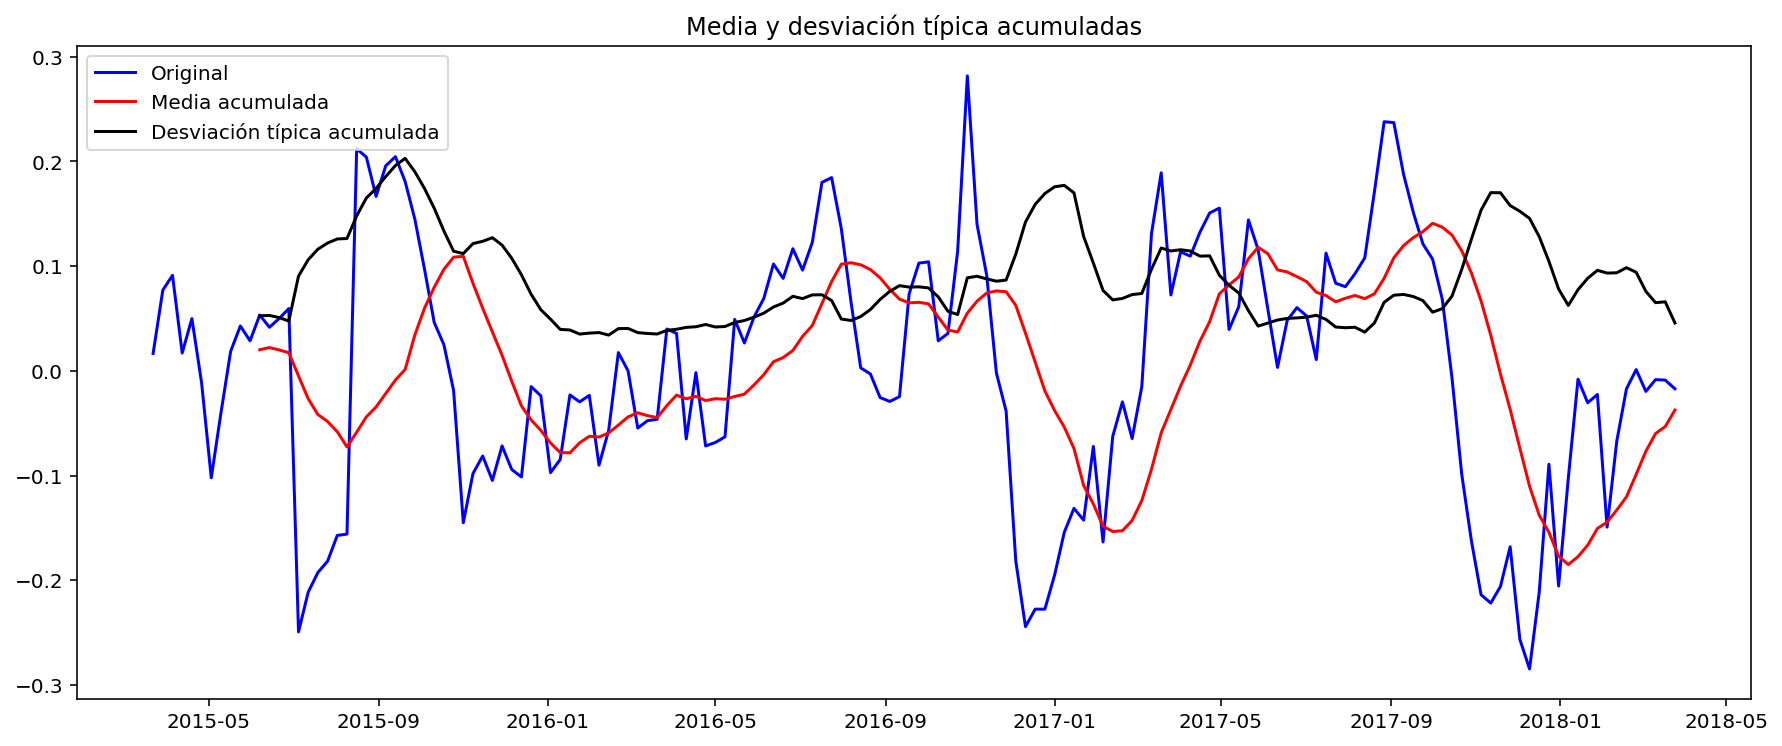

Resultados del test Dickey-Fuller:
Test Statistic                     -4.664416
p-value                             0.000098
#Lags Usados                        5.000000
Número de observaciones usadas    152.000000
Valor crítico (1%)                 -3.474121
Valor crítico (5%)                 -2.880750
Valor crítico (10%)                -2.577013
dtype: float64


In [ ]:
# Vamos a ver el resultado de nuestro test estadístico en nuestros datos transformados
test_stationarity(diferencia)

Hemos conseguido reducir significativamente la diferencia entre el Test Statistic y los valores críticos y esta serie temporal se acerca mucho más a ser estacionaria que la serie temporal original.

# Vamos a utilizar FBProphet para hacer un estudio de la serie temporal

In [ ]:
from fbprophet import Prophet

In [ ]:
df_fb.head()

,media_diaria
Date,
2015-01-04,1.205
2015-01-11,1.215
2015-01-18,1.225
2015-01-25,1.285
2015-02-01,1.125


In [ ]:
# Transformamos los datos para que esten en el formato que espera Prophet
df_fb['y'] = df_fb['media_diaria']
df_fb['ds'] = df_fb.index
df_fb.reset_index(drop=True,inplace=True)
df_fb = df_fb.drop(['media_diaria'], axis=1)

In [ ]:
df_fb.head()

,y,ds
0,1.205,2015-01-04
1,1.215,2015-01-11
2,1.225,2015-01-18
3,1.285,2015-01-25
4,1.125,2015-02-01


In [ ]:
# Vamos a crear nuestro modelo con Prophet
modelo_prophet = Prophet().fit(df_fb)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Ahora vamos a pedirle que nos genere predicciones para los siguientes dos años

future = modelo_prophet.make_future_dataframe(periods=730) # A pesar de que nuestros datos son mensuales, Prophet trabaja por defecto con dias y por lo tanto debemos pedirle que nos genere los siguientes 730 dias
predicciones_prophet = modelo_prophet.predict(future)

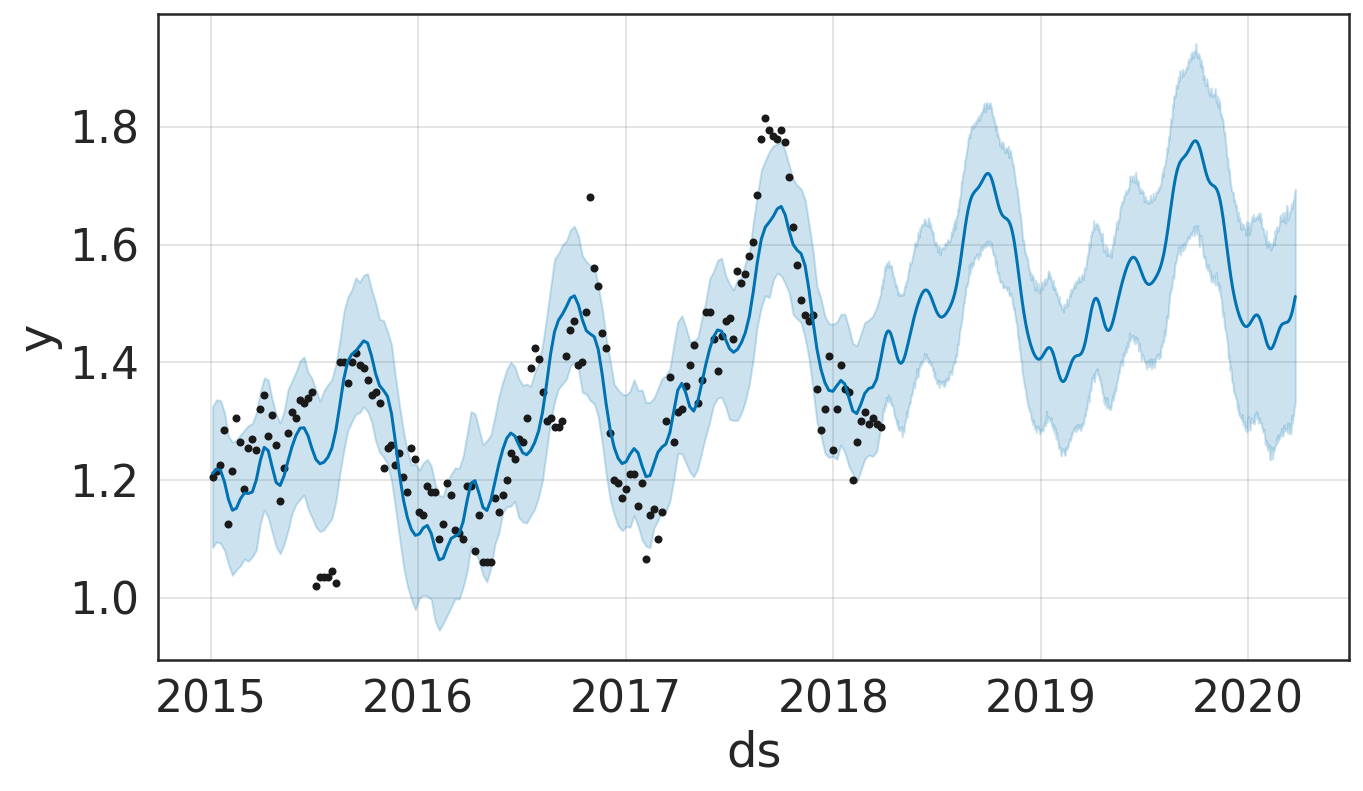

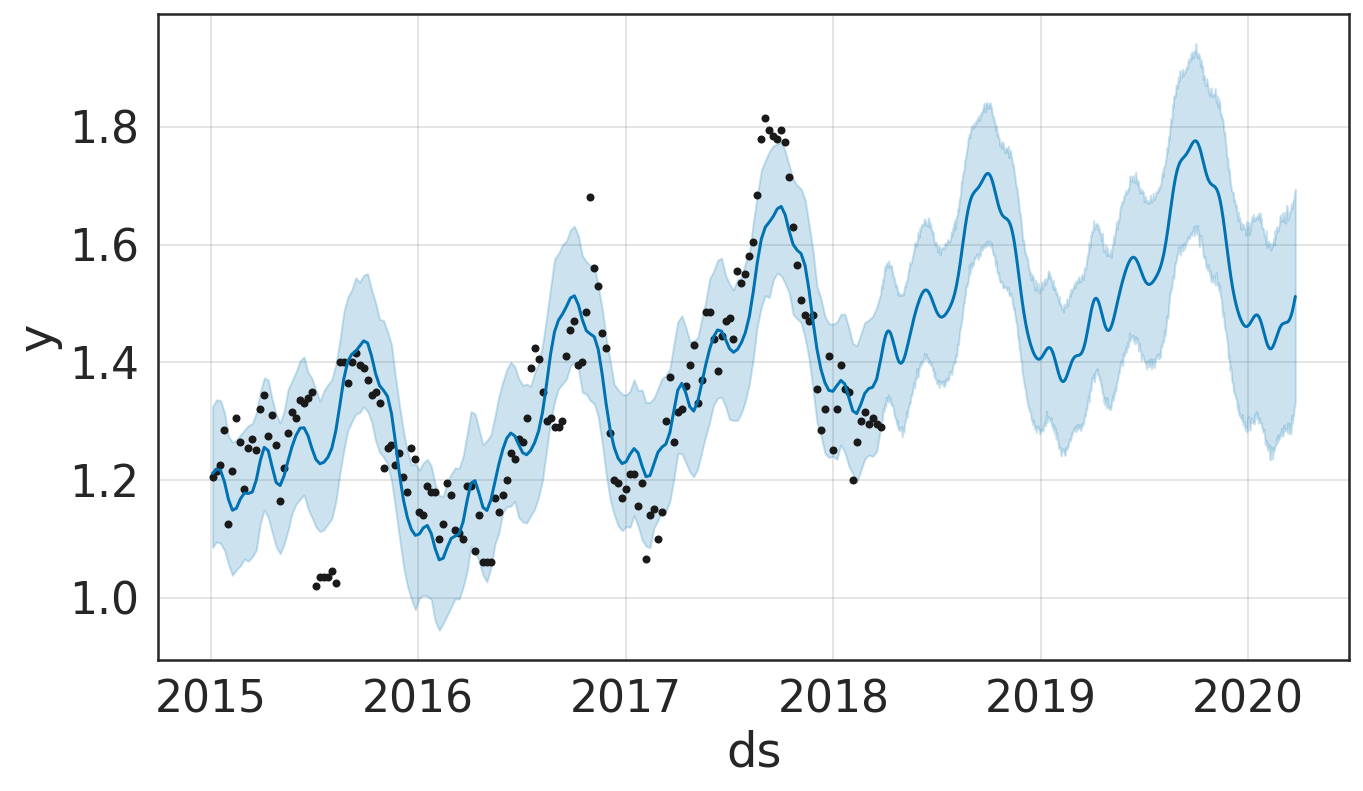

In [ ]:
# Vamos a visualizar las predicciones que ha generado Prophet
modelo_prophet.plot(predicciones_prophet)

Como podemos ver en el gráfico, los puntos son los valores reales que tenemos de nuestra serie temporal que hemos utilizado para entrenar el modelo. La línea azúl representa la predicción del modelo y el área azúl alrededor de la predicción del modelo representa el intervalo de confianza de la predicción, es decir, las posibles variaciones que puede tener los valores de las predicciones. 

Según vayamos pidiendo al modelo que genere más predicciones en el futuro, más grande será el intervalo de confianza de las predicciones puesto que la incertidumbre del modelo será mayor. 

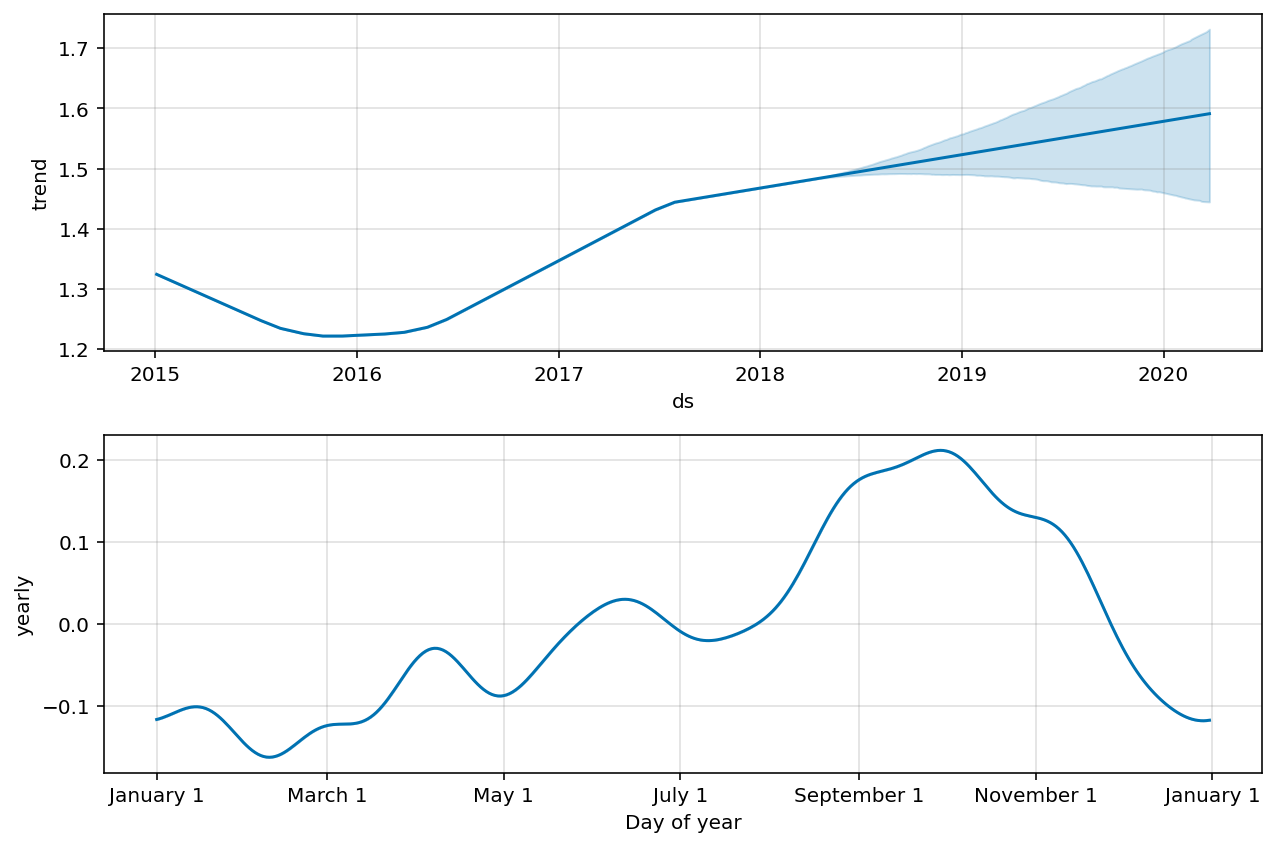

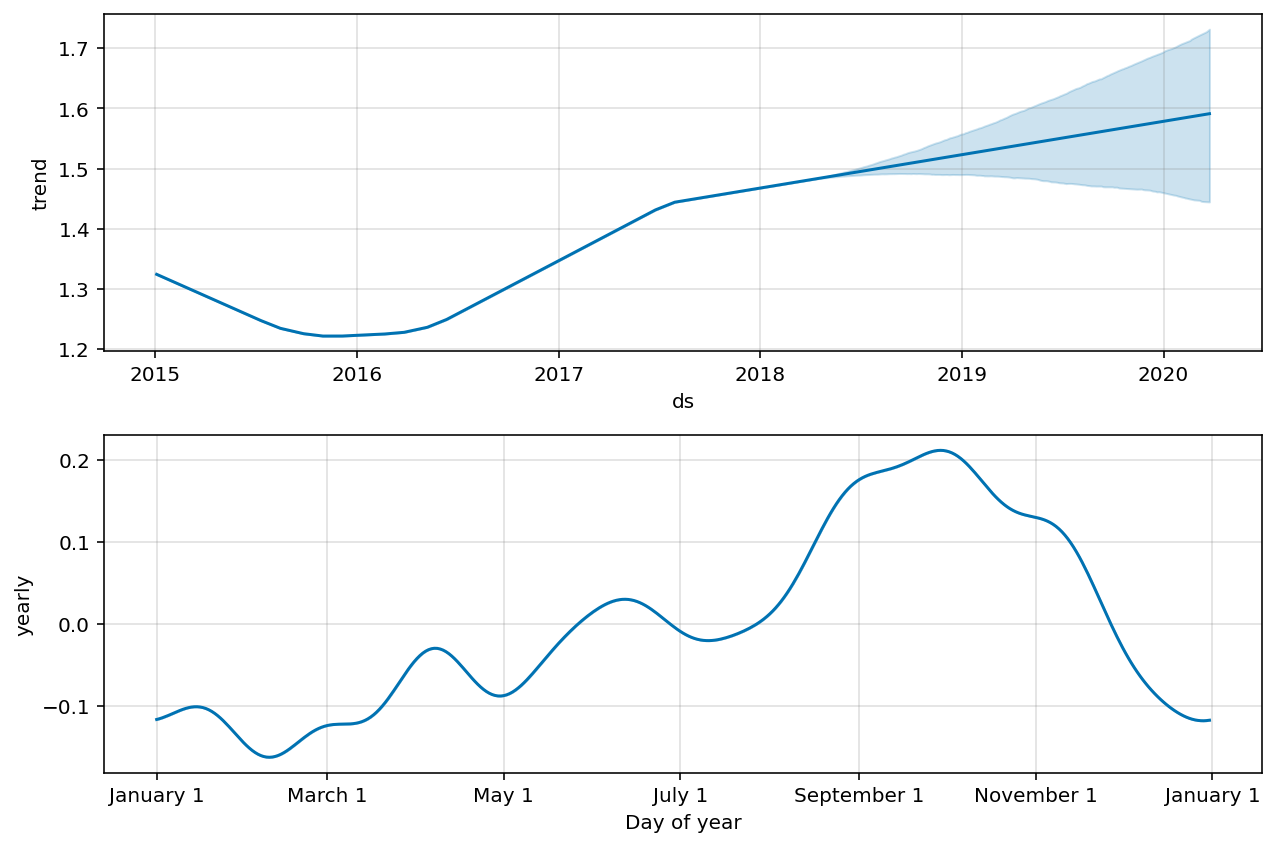

In [ ]:
# También podemos ver los componentes que identifica el Prophet de tendencias y de estacionalidad
modelo_prophet.plot_components(predicciones_prophet)